In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from collections import Counter 

In [4]:
df = pd.read_excel('Yelp_Update_Cleaned_5_20.xlsx')

In [5]:
df['postal_code'].value_counts().tail()

78724    8
78712    6
78747    6
78733    5
78739    3
Name: postal_code, dtype: int64

In [6]:
#individual zip code analysis 

In [7]:
len(df[df['postal_code']==78751])

61

In [8]:
singlezip = df[df['postal_code']==78751]

In [9]:
words = []
count=0

while count < 61: # or len(df[df['postal_code']==78751])
    words.extend(singlezip.iloc[count]['categories'].split(','))
    count+=1
#parses through each row's categories + splits on the comma
#puts all words in the categories column into the "words" list
    
filler_words=[' Restaurants',' Food','Restaurants']
words = [i for i in words if i not in filler_words]  

In [10]:
temp_list=Counter(words).most_common(7)

In [11]:
temp_list

[(' Breakfast & Brunch', 10),
 (' Mexican', 8),
 (' Food Trucks', 8),
 (' American (Traditional)', 7),
 (' Sandwiches', 7),
 (' Bars', 7),
 (' Burgers', 6)]

In [12]:
labels=[]
values=[]

for item in temp_list:
    labels.append(temp_list[temp_list.index(item)][0])
    values.append(temp_list[temp_list.index(item)][1])
labels = [x.strip(' ') for x in labels]

In [13]:
labels = [x.strip(' ') for x in labels]
labels
#see what labels look like, without the count
# (values) should be the same, just corresponding with the "labels"

['Breakfast & Brunch',
 'Mexican',
 'Food Trucks',
 'American (Traditional)',
 'Sandwiches',
 'Bars',
 'Burgers']

In [14]:
values
#NOTE: with the removal of key words like (restaurant, food), the total # of categories may seem smaller

[10, 8, 8, 7, 7, 7, 6]

<Figure size 1200x800 with 0 Axes>

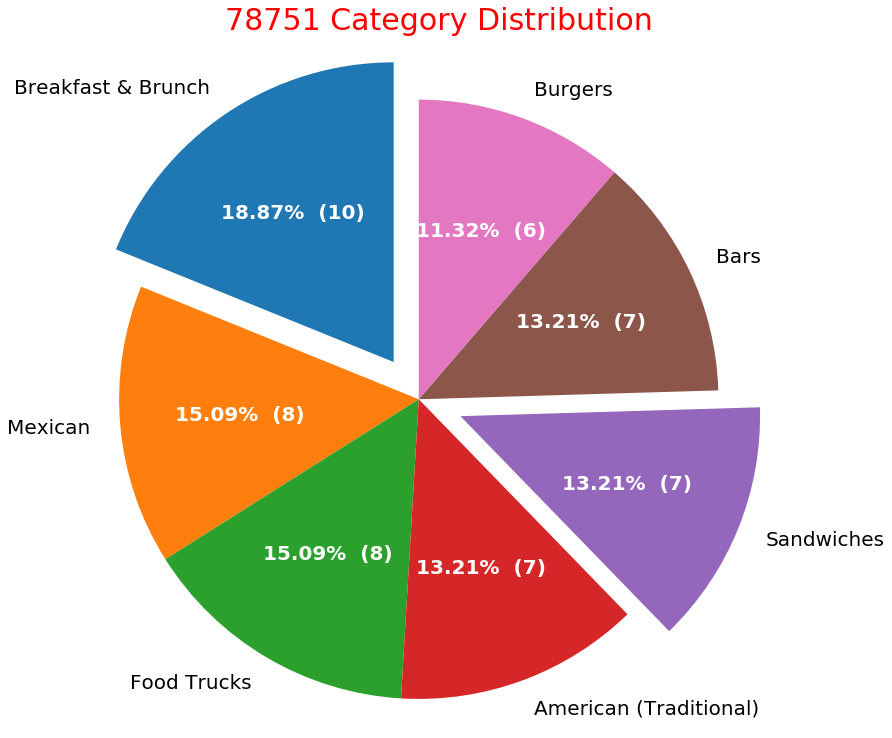

'\n#https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python\n#https://stackoverflow.com/questions/18265935/python-create-list-with-numbers-between-2-values\n#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct\n#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f\n\n#https://www.w3schools.com/python/matplotlib_pie_charts.asp\n'

In [15]:
#plot the pie chart 

plt.figure(dpi=200)  #increase quality
fig1, ax1 = plt.subplots(figsize=(10,10))


#exploding ONLY the categories that have any of the categories below
charlies = ['Sandwiches','Breakfast & Brunch','Bagels']  #specific categories of Nervous Charlie's
res = []
i = 0
while (i < len(labels)):
    if (charlies.count(labels[i]) > 0):
        res.append(i)
    i += 1

explode = [0]*len(temp_list)  #creation of empty list to explode; check w3 link below for more info 
for i in res: 
    explode[i] = 0.15


#not too sure what's going on here, but this creates the pie chart 
#see below for chart support
patches, texts, autotexts = ax1.pie(values, explode=explode, labels=labels,autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(values)/100), startangle=90)
for text in texts:  #outer text manipulation
    text.set_color('black')
    text.set_fontsize(20)
for autotext in autotexts: #inner text manipulation
    autotext.set_color('w')
    autotext.set_fontsize(20)
    autotext.set_fontweight('bold')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()



plt.title('78751 Category Distribution',size=30,color = 'red')
plt.show()

'''
#https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
#https://stackoverflow.com/questions/18265935/python-create-list-with-numbers-between-2-values
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

#https://www.w3schools.com/python/matplotlib_pie_charts.asp
'''

The 7 most common categories in the 78751 zip codes of Austin are: [(' Breakfast & Brunch', 10), (' Mexican', 8), (' Food Trucks', 8), (' American (Traditional)', 7), (' Sandwiches', 7), (' Bars', 7), (' Burgers', 6)]



<Figure size 1200x800 with 0 Axes>

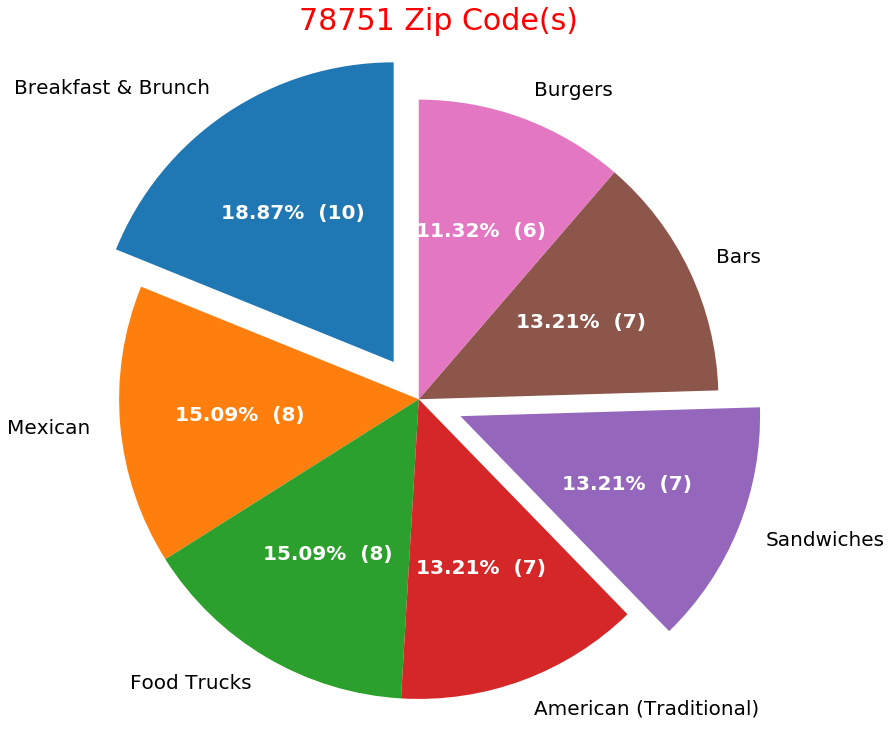

The 7 most common categories in the South zip codes of Austin are: [(' Mexican', 116), (' Nightlife', 100), (' Food Trucks', 98), (' Bars', 92), (' Breakfast & Brunch', 78), (' American (Traditional)', 63), (' Pizza', 46)]



<Figure size 1200x800 with 0 Axes>

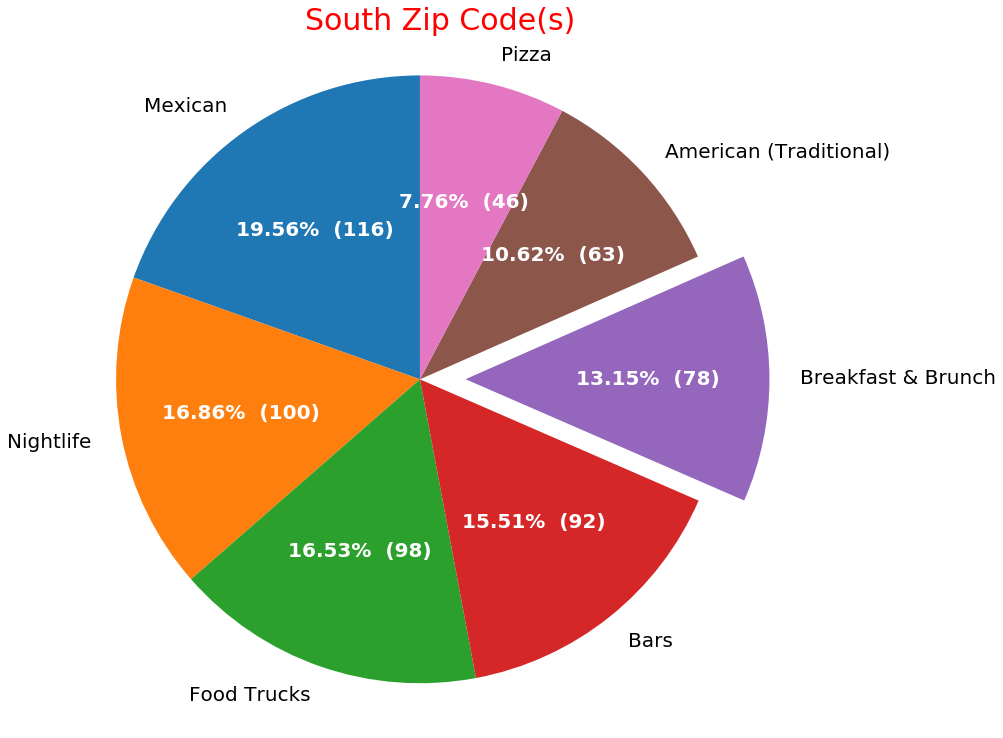

The 7 most common categories in the North zip codes of Austin are: [(' Nightlife', 229), (' Bars', 222), (' Breakfast & Brunch', 147), (' American (New)', 145), (' Mexican', 143), (' Food Trucks', 138), (' American (Traditional)', 132)]



<Figure size 1200x800 with 0 Axes>

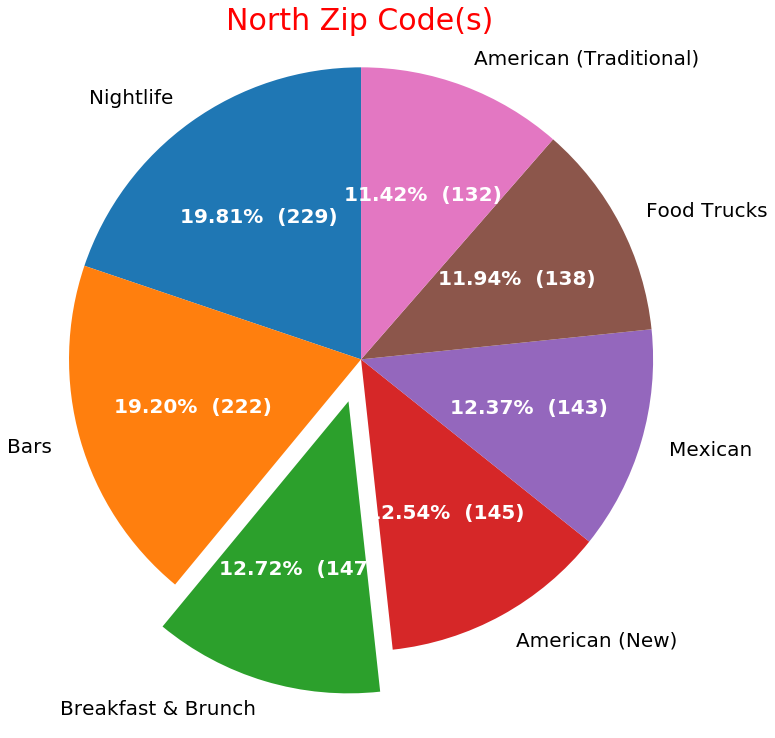

The 7 most common categories in the East zip codes of Austin are: [(' Nightlife', 86), (' Bars', 81), (' Mexican', 75), (' Food Trucks', 69), (' Breakfast & Brunch', 55), (' American (Traditional)', 44), (' Sandwiches', 42)]



<Figure size 1200x800 with 0 Axes>

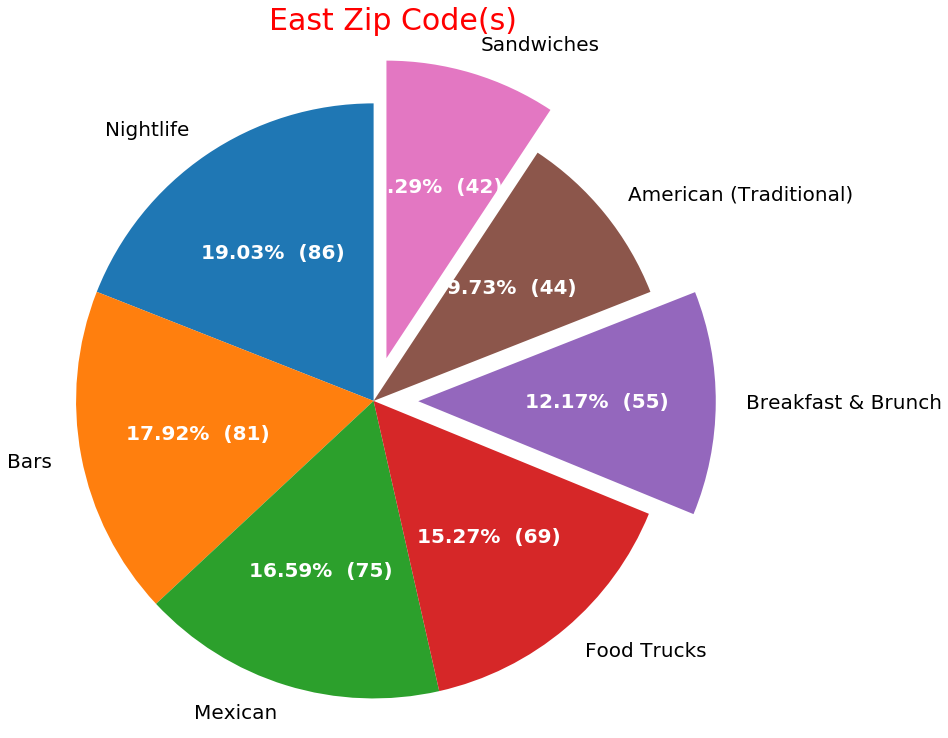

The 7 most common categories in the West zip codes of Austin are: [(' American (New)', 15), (' Nightlife', 13), (' Sandwiches', 12), (' Breakfast & Brunch', 12), (' Mexican', 10), (' Pizza', 10), (' Bars', 10)]



<Figure size 1200x800 with 0 Axes>

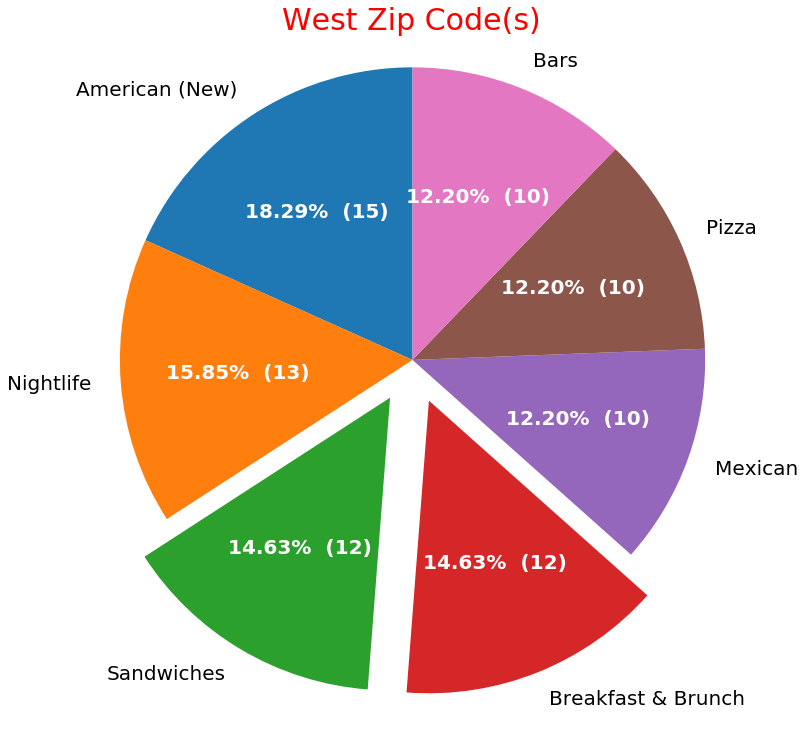

The 7 most common categories in the Popular zip codes of Austin are: [(' Nightlife', 141), (' Bars', 139), (' American (New)', 99), (' Breakfast & Brunch', 87), (' Food Trucks', 84), (' American (Traditional)', 82), (' Mexican', 69)]



<Figure size 1200x800 with 0 Axes>

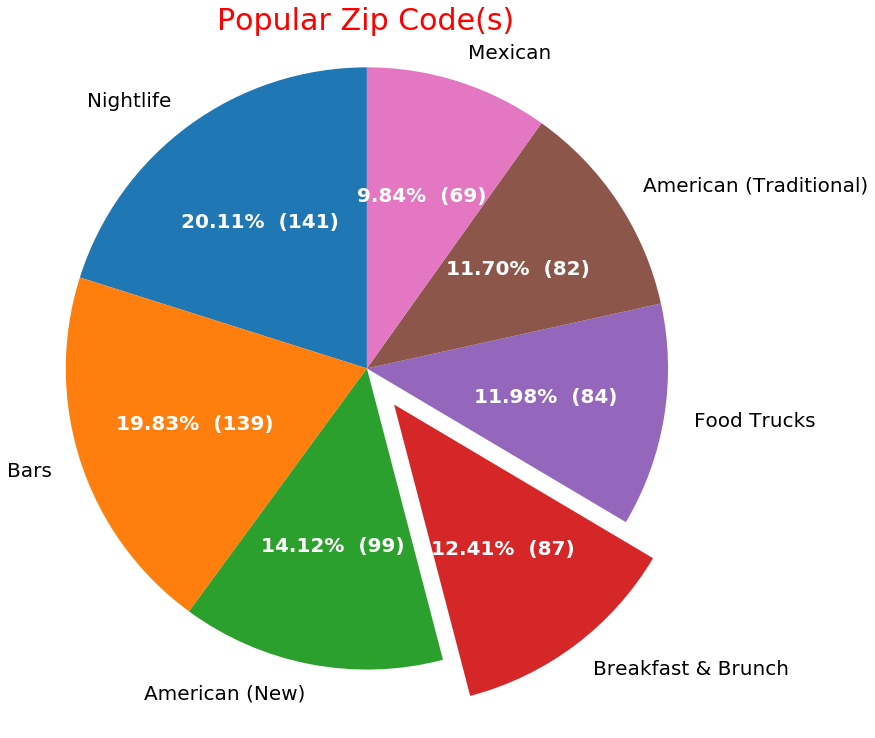

In [16]:
single = [78751]
southzips = [78704, 78749, 78745, 78748, 78741,78744]
northzips = [78730,78731,78732,78734,78613,78727,78758,78753,78751,78757,78701,78703,78705,78756,78759,78750,78728,78712]
eastzips = [78702,78721,78723,78742,78722,78752,78719,78724]
westzips = [78746,78733,78735]
popzips = [78746,78722,78723,78613,78701,78705,78759]

total_zips = [single,southzips,northzips,eastzips,westzips,popzips]


filler_words=[' Restaurants',' Food','Restaurants','Food']
names = ['78751','South','North','East','West','Popular']


for z in total_zips:

    temp_df = df[df['postal_code'].isin(z)]

    words = []
    inner_count=0

    while inner_count < len(temp_df): 
        words.extend(temp_df.iloc[inner_count]['categories'].split(','))
        inner_count+=1
        
    words = [i for i in words if i not in filler_words]  
    temp_list = Counter(words).most_common(7)
    print(f'The 7 most common categories in the {names[total_zips.index(z)]} zip codes of Austin are: {temp_list}\n')
    
    labels=[]
    values=[]

    for item in temp_list:
        labels.append(temp_list[temp_list.index(item)][0])
        values.append(temp_list[temp_list.index(item)][1])
    labels = [x.strip(' ') for x in labels]
    
    
    plt.figure(dpi=200)  #increase quality
    fig1, ax1 = plt.subplots(figsize=(10,10))


    #exploding ONLY the categories that have any of the categories below
    charlies = ['Sandwiches','Breakfast & Brunch','Bagels']  #specific categories of Nervous Charlie's
    res = []
    i = 0
    while (i < len(labels)):
        if (charlies.count(labels[i]) > 0):
            res.append(i)
        i += 1

    explode = [0]*len(temp_list)  #creation of empty list to explode; check w3 link below for more info 
    for i in res: 
        explode[i] = 0.15


    #not too sure what's going on here, but this creates the pie chart 
    #see below for chart support
    patches, texts, autotexts = ax1.pie(values, explode=explode, labels=labels,autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(values)/100), startangle=90)
    for text in texts:  #outer text manipulation
        text.set_color('black')
        text.set_fontsize(20)
    for autotext in autotexts: #inner text manipulation
        autotext.set_color('w')
        autotext.set_fontsize(20)
        autotext.set_fontweight('bold')
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()

    plt.title(f'{names[total_zips.index(z)]} Zip Code(s)',size=30,color = 'red')
    plt.show()


The category distribution in the 78751 zip codes of Austin are: [(' Breakfast & Brunch', 10), (' Sandwiches', 7), (' Bagels', 2)]



<Figure size 1200x800 with 0 Axes>

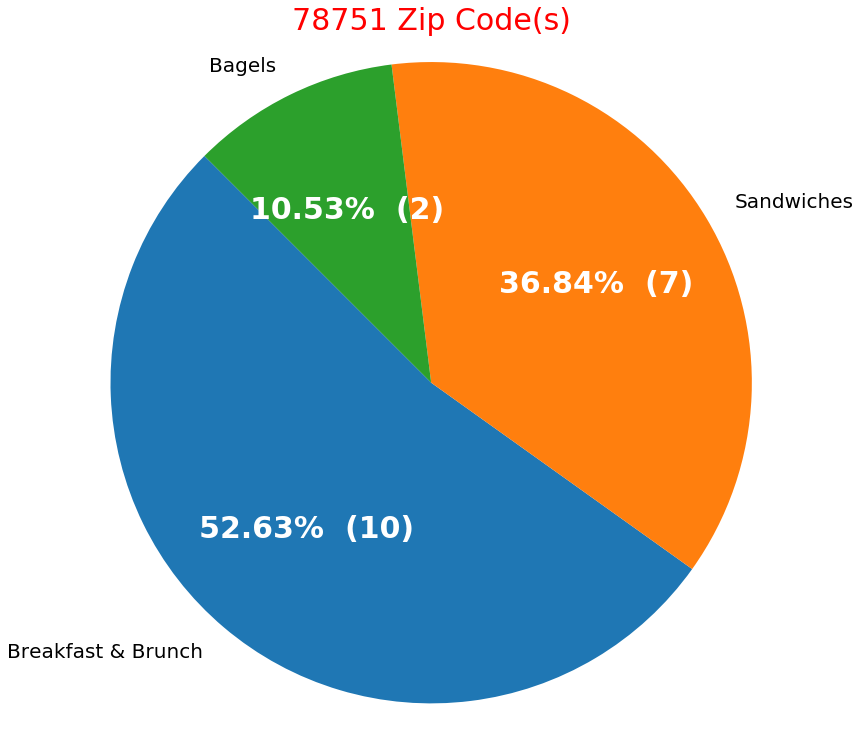

The category distribution in the South zip codes of Austin are: [(' Breakfast & Brunch', 78), (' Sandwiches', 44), (' Bagels', 3)]



<Figure size 1200x800 with 0 Axes>

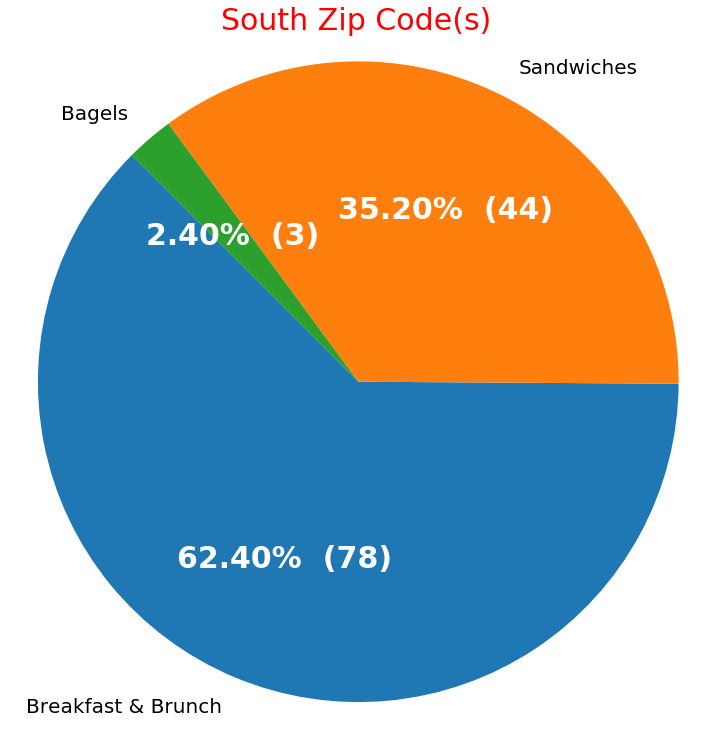

The category distribution in the North zip codes of Austin are: [(' Breakfast & Brunch', 147), (' Sandwiches', 107), (' Bagels', 10)]



<Figure size 1200x800 with 0 Axes>

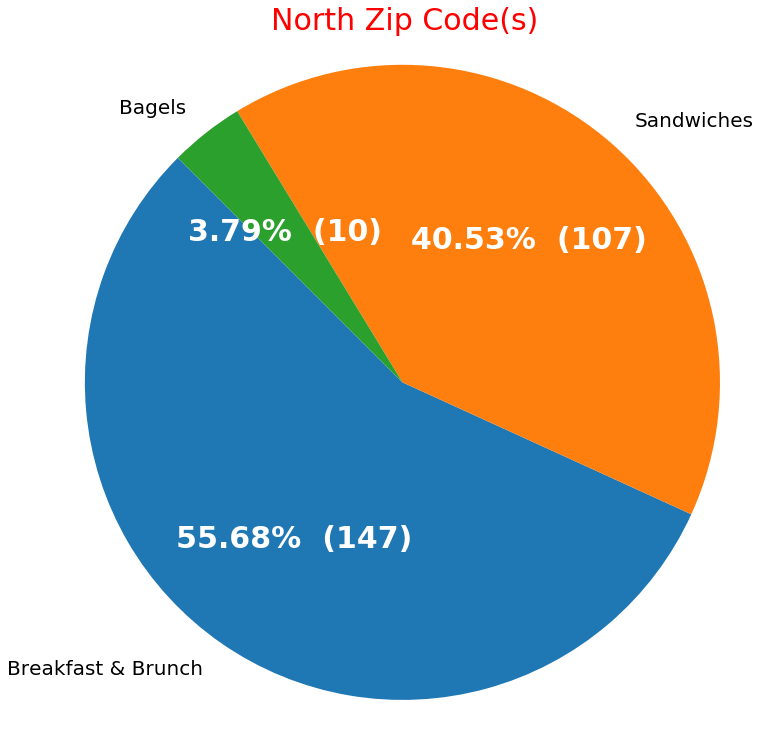

The category distribution in the East zip codes of Austin are: [(' Breakfast & Brunch', 52), (' Sandwiches', 42), (' Bagels', 1)]



<Figure size 1200x800 with 0 Axes>

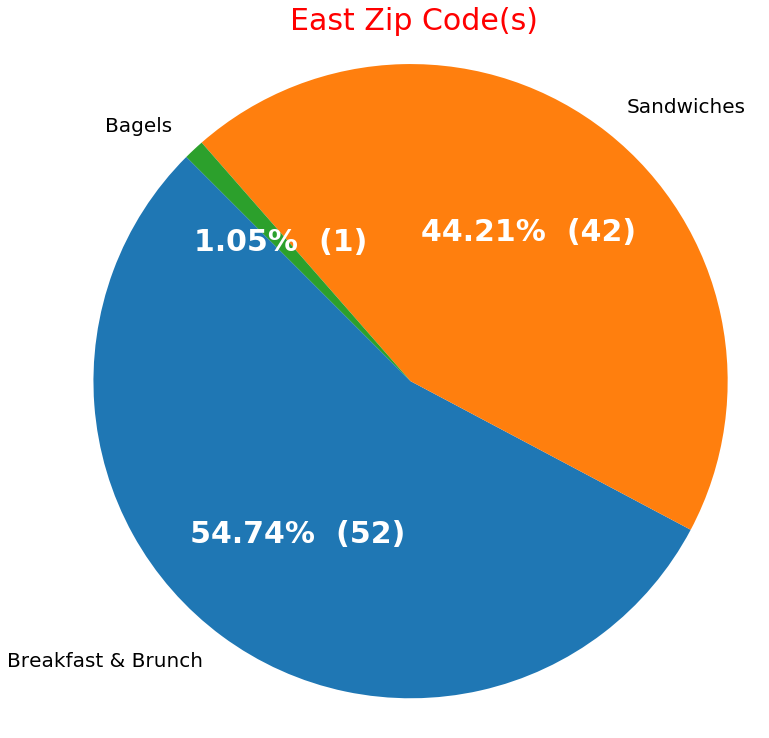

The category distribution in the West zip codes of Austin are: [(' Sandwiches', 12), (' Breakfast & Brunch', 12)]



<Figure size 1200x800 with 0 Axes>

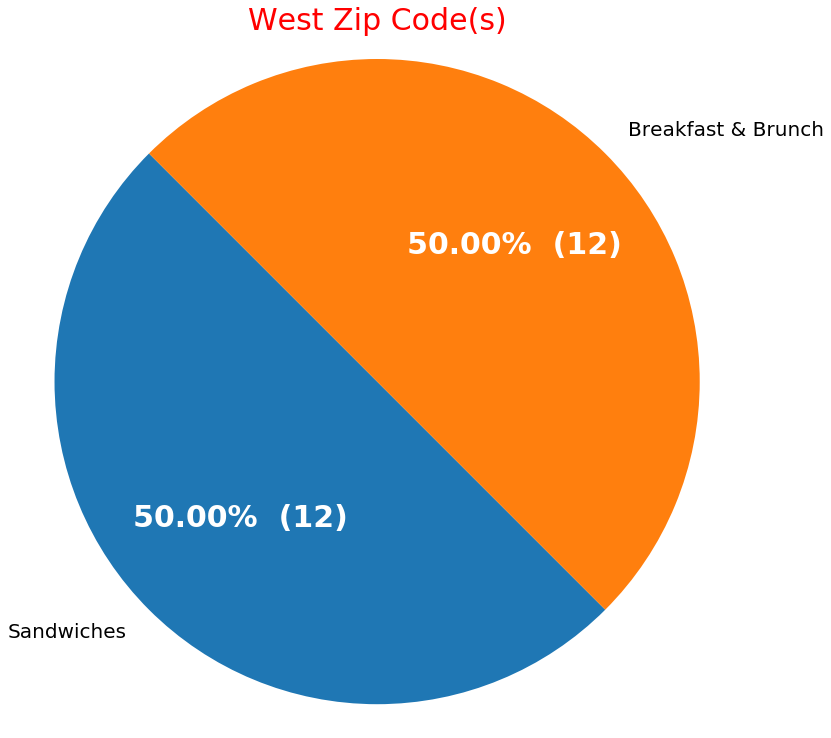

The category distribution in the Popular zip codes of Austin are: [(' Breakfast & Brunch', 87), (' Sandwiches', 64), (' Bagels', 4)]



<Figure size 1200x800 with 0 Axes>

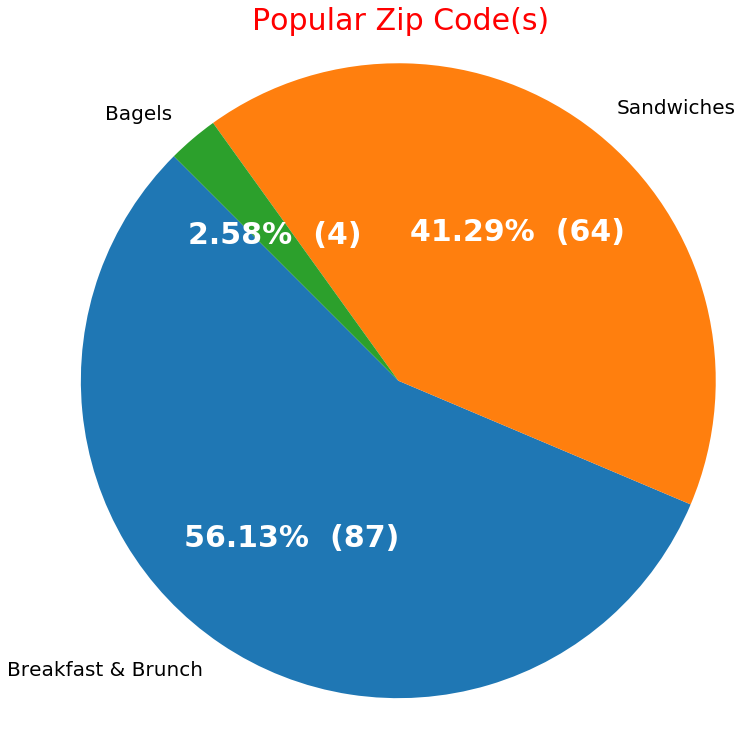

In [17]:
single = [78751]
southzips = [78704, 78749, 78745, 78748, 78741,78744]
northzips = [78730,78731,78732,78734,78613,78727,78758,78753,78751,78757,78701,78703,78705,78756,78757,78759,78750,78728]
eastzips = [78702,78721,78723,78742,78722,78752,78719]
westzips = [78746,78733,78735]
popzips = [78746,78722,78723,78613,78701,78705,78759]

total_zips = [single,southzips,northzips,eastzips,westzips,popzips]


charlies=[' Sandwiches', ' Bagels',' Breakfast & Brunch']  #changed to Charlie's specific categories
names = ['78751','South','North','East','West','Popular']

for z in total_zips:

    temp_df = df[df['postal_code'].isin(z)]

    words = []
    inner_count=0

    while inner_count < len(temp_df): 
        words.extend(temp_df.iloc[inner_count]['categories'].split(','))
        inner_count+=1
        
    words = [i for i in words if i in charlies]  #modify words list to only include category words above
    temp_list = Counter(words).most_common(3)  
    print(f'The category distribution in the {names[total_zips.index(z)]} zip codes of Austin are: {temp_list}\n')
    
    
    labels=[]
    values=[]

    for item in temp_list:
        labels.append(temp_list[temp_list.index(item)][0])
        values.append(temp_list[temp_list.index(item)][1])
    labels = [x.strip(' ') for x in labels]
    
    
    plt.figure(dpi=200)  #increase quality
    fig1, ax1 = plt.subplots(figsize=(10,10))


    #exploding ONLY the categories that have any of the categories below



    #not too sure what's going on here, but this creates the pie chart 
    #see below for chart support
    patches, texts, autotexts = ax1.pie(values, labels=labels,autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(values)/100), startangle=135)
    
    for text in texts:  #outer text manipulation
        text.set_color('black')
        text.set_fontsize(20)
    
    for autotext in autotexts: #inner text manipulation
        autotext.set_color('w')
        autotext.set_fontsize(30)
        autotext.set_fontweight('bold')
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()

    
    plt.title(f'{names[total_zips.index(z)]} Zip Code(s)',size=30,color = 'red')
    plt.show()

    